In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


Open Dataset in Pandas Dataframe

In [2]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [4]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [5]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6342/6342 [==============================] - 21s 3ms/step - loss: 0.2551 - accuracy: 0.9051
Epoch 2/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2446 - accuracy: 0.9070
Epoch 3/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2418 - accuracy: 0.9079
Epoch 4/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2407 - accuracy: 0.9080
Epoch 5/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2396 - accuracy: 0.9081
Epoch 6/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2388 - accuracy: 0.9079
Epoch 7/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2383 - accuracy: 0.9079
Epoch 8/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2381 - accuracy: 0.9083
Epoch 9/10
6342/6342 [==============================] - 14s 2ms/step - loss: 0.2380 - accuracy: 0.9082
Epoch 10/10
6342/6342 [==============================] - 14s 2ms/step - l

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.2409 - accuracy: 0.9066


In [9]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

1586/1586 [==============================] - 3s 2ms/step


In [10]:
# Showing relevant information about the Neural Networks model
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 50736
Actual Healthy Subjects: 45923
Actual Sick Subjects: 4813
Predicted Healthy Subjects: 45923
Predicted Sick Subjects: 4813
Test Set Accuracy: 0.9065949227373068


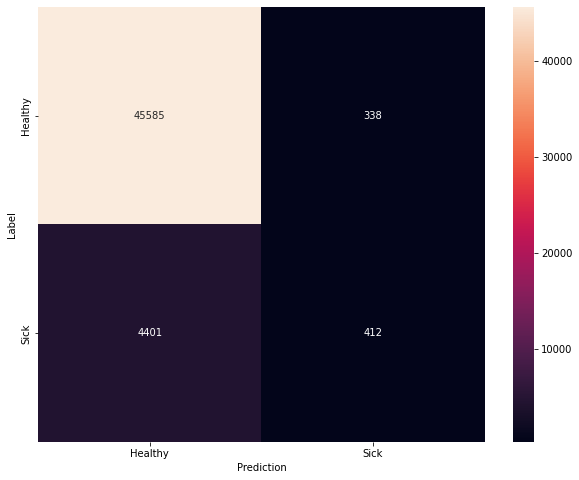

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45923
         1.0       0.55      0.09      0.15      4813

    accuracy                           0.91     50736
   macro avg       0.73      0.54      0.55     50736
weighted avg       0.88      0.91      0.87     50736



In [11]:
# Showing the results of the Neural Networks model through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, predictions))

Result: High Accuracy, High Bias

Decision Tree Classifier, with and without K-Folds doubling the weight for Sick label

In [12]:
# Create the model
model = DecisionTreeClassifier()

# Create the KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the evaluation metrics for each fold
eval_metrics = []

In [13]:
X = df.values
y = target.values
sample_weight = tf.where(y_train == 1, 2, 1)

# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train, sample_weight=sample_weight)

     # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f'Test score: {score:.2f}')

# Calculate the mean and standard deviation of the evaluation metrics
mean_accuracy = np.mean([x[0] for x in eval_metrics])
std_accuracy = np.std([x[0] for x in eval_metrics])
mean_f1_score = np.mean([x[1] for x in eval_metrics])
std_f1_score = np.std([x[1] for x in eval_metrics])

print(f'Mean accuracy: {mean_accuracy:.3f} (+/- {std_accuracy:.3f})')
print(f'Mean F1 score: {mean_f1_score:.3f} (+/- {std_f1_score:.3f})')

Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Mean accuracy: nan (+/- nan)
Mean F1 score: nan (+/- nan)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered 

In [14]:
# Fit the model to the training data
model.fit(X_train, y_train, sample_weight=sample_weight)

DecisionTreeClassifier()

In [15]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
F1 score: 0.25


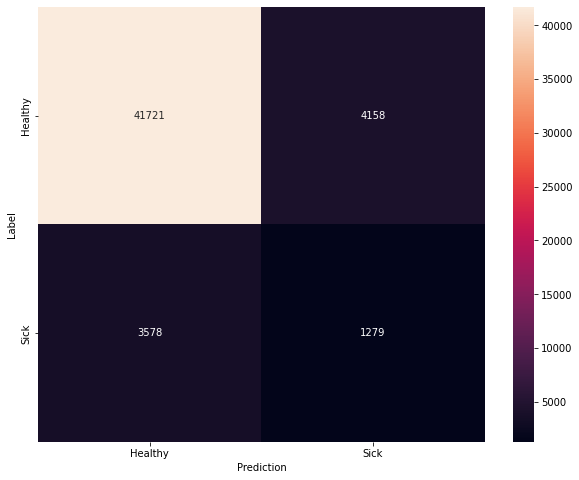

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     45879
         1.0       0.08      0.01      0.02      4857

    accuracy                           0.89     50736
   macro avg       0.49      0.50      0.48     50736
weighted avg       0.83      0.89      0.85     50736



In [16]:
# Showing the results through a confusion matrix of the Decision Tree Classifier model without K-folds and doubling the weight
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: Lower accuracy and Lower Bias

Random Forest Classifier

In [17]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [19]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.91
F1 score: 0.09


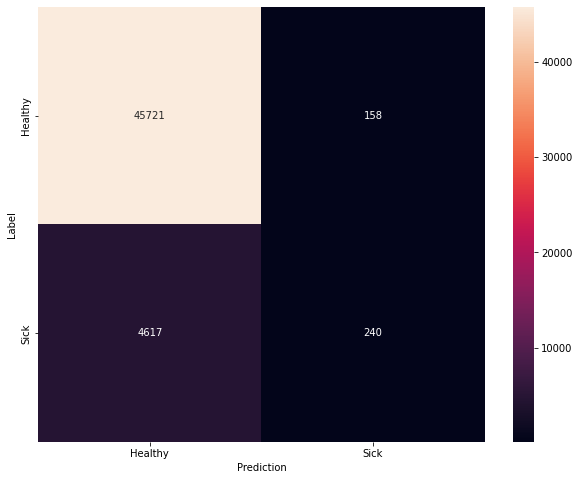

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     45879
         1.0       0.08      0.01      0.02      4857

    accuracy                           0.89     50736
   macro avg       0.49      0.50      0.48     50736
weighted avg       0.83      0.89      0.85     50736



In [20]:
# Showing the results of the Random Forest Classifier through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: High Accuracy, High Bias

Neural Networks using SMOTE

In [21]:
X = df.values
y = target.values

# Create a SMOTE object
smote = SMOTE()

# Use the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [22]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11490/11490 [==============================] - 30s 2ms/step - loss: 0.4734 - accuracy: 0.7769
Epoch 2/10
11490/11490 [==============================] - 28s 2ms/step - loss: 0.4247 - accuracy: 0.8042
Epoch 3/10
11490/11490 [==============================] - 28s 2ms/step - loss: 0.3778 - accuracy: 0.8263
Epoch 4/10
11490/11490 [==============================] - 29s 3ms/step - loss: 0.3522 - accuracy: 0.8385
Epoch 5/10
11490/11490 [==============================] - 31s 3ms/step - loss: 0.3338 - accuracy: 0.8474
Epoch 6/10
11490/11490 [==============================] - 32s 3ms/step - loss: 0.3212 - accuracy: 0.8529
Epoch 7/10
11490/11490 [==============================] - 34s 3ms/step - loss: 0.3135 - accuracy: 0.8562
Epoch 8/10
11490/11490 [==============================] - 37s 3ms/step - loss: 0.3083 - accuracy: 0.8580
Epoch 9/10
11490/11490 [==============================] - 42s 4ms/step - loss: 0.3032 - accuracy: 0.8605
Epoch 10/10
11490/11490 [==============================

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

2873/2873 [==============================] - 7s 2ms/step - loss: 0.2860 - accuracy: 0.8682


In [26]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

2873/2873 [==============================] - 5s 2ms/step


In [27]:
# Showing relevant information about the Neural Networks model with SMOTE
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 91915
Actual Healthy Subjects: 46061
Actual Sick Subjects: 45854
Predicted Healthy Subjects: 46061
Predicted Sick Subjects: 45854
Test Set Accuracy: 0.8681825599738889


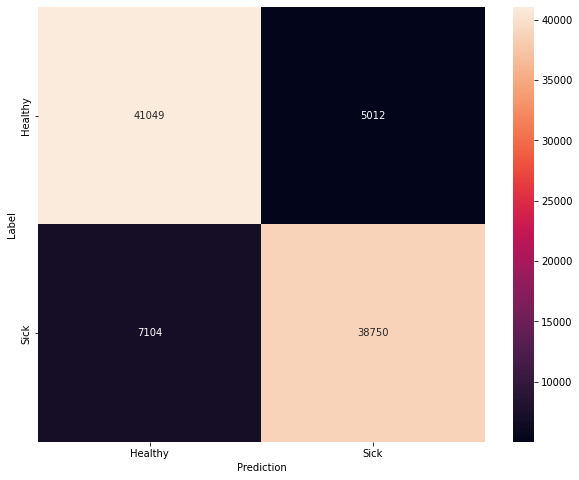

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     46061
         1.0       0.89      0.85      0.86     45854

    accuracy                           0.87     91915
   macro avg       0.87      0.87      0.87     91915
weighted avg       0.87      0.87      0.87     91915



In [28]:
# Showing the results of the NN model with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, predictions))

Result: Decent Accuracy and Low Bias

Decision Tree Classifier using SMOTE

In [29]:
# Create the model
model = DecisionTreeClassifier()

Using same SMOTED training and test datasets as Neural Networks

In [30]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.92
F1 score: 0.92


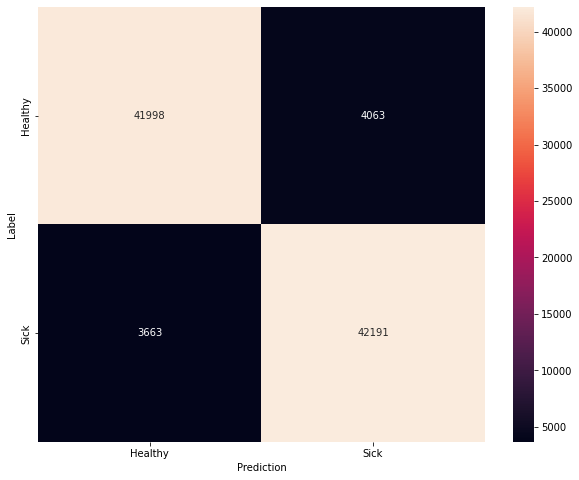

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     46061
         1.0       0.89      0.85      0.86     45854

    accuracy                           0.87     91915
   macro avg       0.87      0.87      0.87     91915
weighted avg       0.87      0.87      0.87     91915



In [32]:
# Showing the results of the Decision Tree Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: High Accuracy, even lower Bias

Random Forest Classifier using SMOTE

In [33]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

Same SMOTED Training and Test Datasets as DT and NN

In [34]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [35]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.91
F1 score: 0.91


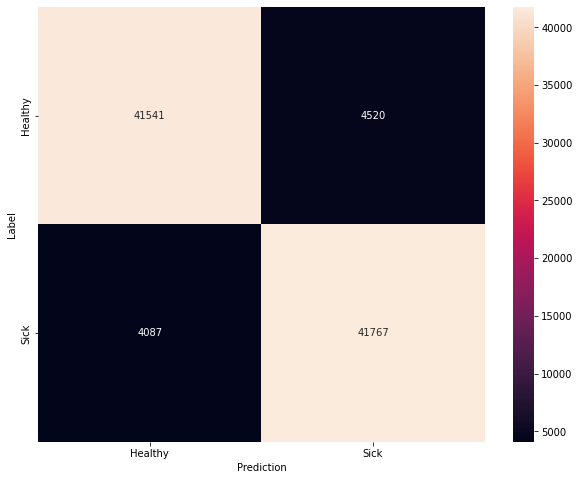

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     46061
         1.0       0.89      0.85      0.86     45854

    accuracy                           0.87     91915
   macro avg       0.87      0.87      0.87     91915
weighted avg       0.87      0.87      0.87     91915



In [36]:
# Showing the results of the Random Forest Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Similar result as Decision Tree